<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Peer Reviewed Assignment: notebook</font></h1>

# Introduction

This notebook is part of the Peer Reviewed Assignment.
1. Understand the dataset: Selected socioeconomic indicators in Chicago
1. Connect to IBM DB2 Warehouse on Cloud
1. Problems 
1. Close the Connection




## Understand the datasets 

We will be using three datasets to complete the assignments in this notebook

### Selected Socioeconomic indicators in Chicago

The city of Chicago released a datset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” by Chicago community area, for the years 2008 – 2012. The indicators used to calculate the "Hardship index" are:
1. Percent of Housing Crowded
1. Percent Households Below Poverty
1. Percent Ages 16+ Unemployed
1. Percent Aged 25+ without High School Diploma
1. Percent Aged Under 16 or Over 64
1. Per Capita Income

 Scores on the index can range from 1 to 100, with a higher index number representing a greater level of hardship. The scores are standardized according to the data for the 77 community areas, and therefore cannot be compared to scores generated for other
jurisdictions. 

The observations in the dataset were obtained from the census tract-level estimates obtained from the link:
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2

Navigate to the Export tab(top left side of the site) and download the CSV file.

The dataset has the following variables:

Community Area Number: Used to uniquely identify each row of the dataset

Community Area Name: Reffers to the region in the city of Chicago 

Percent of Housing Crowded: Percent occupied housing units with more than one person per room

Percent Households Below Poverty: Percent of households living below federal poverty level

Percent Ages 16+ Unemployed: Percent of persons over the age of 16 years that are unemployed

Percent Aged 25+ without High School Diploma: Percent of persons over the age of 25 years without a high school education

Percent Aged Under 16 or Over 64:Percent of population under 16 or over 64 years of age(ie. dependency)

Per Capita Income: Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

Hardship Index: Score that incorporates each of the six selected socioeconomic indicators

### Chicago Public Schools

This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

The observations in the dataset were obtained from the census tract-level estimates obtained from the link:
https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t
You can take a look at the columns in the dataset from this link.

Navigate to the Export tab(top left side of the site) and download the CSV file. 

### Chicago Crime Data 

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. This dataset is provided by the city of Chicago's Data Portal.

The observations in the dataset were obtained from the census tract-level estimates obtained from the link:
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
You can take a look at the columns in the dataset from this link.

Navigate to the Export tab(top left side of the site) and download the CSV file. 





## Connect to IBM DB2 Warehouse on cloud and store data in a table

__Notice:__ Please follow the instructions given in Module 1 > Lab1 to Create a database service instance on DB2 Warehouse on Cloud.

### Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.


We import the ibm_db library into our Python Application

In [3]:
import ibm_db
#connection for pandas
import ibm_db_dbi

When the command above completes, the `ibm_db` library is loaded in your notebook. 


### Identify the database connection credentials

Connecting to dashDB or DB2 database requires the following information:
* Driver Name
* Database name 
* Host DNS name or IP address 
* Host port
* Connection protocol
* User ID
* User Password



__Notice:__ To obtain credentials please refer to the instructions given in Lab 1 of this module

Here are the database credentials:


In [ ]:
dsn_driver = "<driver>"
dsn_database = "<database>"            # e.g. "BLUDB"
dsn_hostname = "<hostname>" # e.g.: "awh-yp-small03.services.dal.bluemix.net"
dsn_port = "<port>"                # e.g. "50000" 
dsn_protocol = "<protocol>"            # i.e. "TCPIP"
dsn_uid = "<id>"        # e.g. "dash104434"
dsn_pwd = "<password>"       # e.g. "7dBZ3jWt9xN6$o0JiX!m"


Enter your database credentials 

In [4]:
dsn_driver = ""
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_hostname = "dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net" # e.g.: "awh-yp-small03.services.dal.bluemix.net"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_uid = "rdq77411"        # e.g. "dash104434"
dsn_pwd = "3x4w2g9@9rkxv9x5"       # e.g. "7dBZ3jWt9xN6$o0JiX!m"


### Create the DB2 database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.


Create the database connection


In [5]:
#Create database connection
dsn = (
    "DRIVER={{IBM DB2 ODBC DRIVER}};"
    "DATABASE={0};"
    "HOSTNAME={1};"
    "PORT={2};"
    "PROTOCOL=TCPIP;"
    "UID={3};"
    "PWD={4};").format(dsn_database, dsn_hostname, dsn_port, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected!")

except:
    print ("Unable to connect to database")



Connected!


### Store the dataset in a Table

We need to create 3 tables : CENSUS_DATA , CHICAGO_PUBLIC_SCHOOLS and CHICAGO_CRIME_DATA on DB2 Warehouse on Cloud to store the datasets that we will be using in this lesson. We will be using the console provided by DB2 warehouse on cloud for this process. There are four steps involved in loading data into a table : source, target, define and finalize.
We first load the spreadsheet into DB2 warehouse on Cloud using the console. We then select a target Schema and then you will be given an option to load the data into an existing table or create a new table. When you choose to create a new table you have the option to specify the table name. Next you will see a preview of the data where you can also define the columns and data types. Review the settings and begin the load. When the loading is complete, you can see the statistics on the loaded data. Next let us explore the socioeconomic indicators dataset using Python.


In [180]:
import pandas as pd
pconn = ibm_db_dbi.Connection(conn)

sql_census = "SELECT * FROM CHICAGO_SOCIOECONOMIC_DATA"
sql_school = "SELECT * FROM CHICAGO_PUBLIC_SCHOOL"
# sql_crime = "SELECT * FROM CHICAGO_PUBLIC_SCHOOL"  # this dataset is big and my account is lite (for now)
df_census = pd.read_sql(sql_census, pconn)
df_school = pd.read_sql(sql_school, pconn)

#print(df_census.head())
print(df_school.head())

   School_ID                                     Name_of_School  \
0     610038                  Abraham Lincoln Elementary School   
1     610281  Adam Clayton Powell Paideia Community Academy ...   
2     610185                Adlai E Stevenson Elementary School   
3     609993                    Agustin Lara Elementary Academy   
4     610513                      Air Force Academy High School   

  Elementary, Middle, or High School         Street_Address     City State  \
0                                 ES        615 W Kemper Pl  Chicago    IL   
1                                 ES  7511 S South Shore Dr  Chicago    IL   
2                                 ES     8010 S Kostner Ave  Chicago    IL   
3                                 ES     4619 S Wolcott Ave  Chicago    IL   
4                                 HS        3630 S Wells St  Chicago    IL   

   ZIP_Code    Phone_Number  \
0     60614  (773) 534-5720   
1     60649  (773) 535-6650   
2     60652  (773) 535-2280   
3   

## Problems

### Problem 1

Find the total number of records for each of the tables

In [8]:
print("Number of rows for census data: {0}".format(len(df_census)))
print("Number of rows for school data: {0}".format(len(df_school)))

Number of rows for census data: 78
Number of rows for school data: 566


### Problem 2

Find average college enrollments by community area

  Community_Area_Name  College_Enrollment__number_of_students_
0        LINCOLN PARK                               678.000000
1         SOUTH SHORE                               910.777778
2             ASHBURN                               626.857143
3            NEW CITY                               826.400000
4       ARMOUR SQUARE                              1077.285714


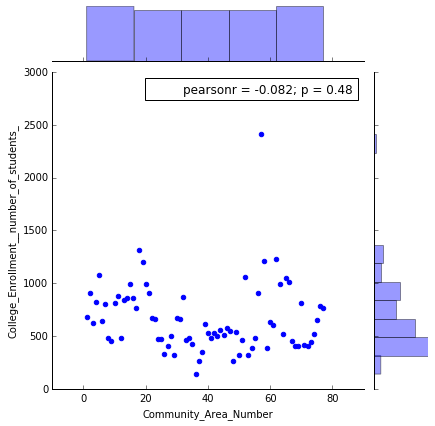

In [121]:
#print([c for c in df_school.columns if "Enrollment" in c])

df_school_gb = df_school.groupby('Community_Area_Number', as_index=False)['College_Enrollment__number_of_students_'].mean()
df_school_gb = df_school_gb.join(df_school['Community_Area_Name'])

print(df_school_gb[['Community_Area_Name','College_Enrollment__number_of_students_']].head())

import matplotlib as plt
%matplotlib inline 
import seaborn as sns
sns.jointplot(x='Community_Area_Number', y='College_Enrollment__number_of_students_', data=df_school_gb)

### Problem 3

Find the number of schools that are healthy school certified

In [135]:
print([c for c in df_school.columns if "Health" in c])

print(len(df_school[df_school['Healthy_Schools_Certified_']=='Yes']))

['Healthy_Schools_Certified_']
16


### Problem 4

How many observations have a LocationDescription value of GAS STATION?

In [270]:
# This uses the crime data, which is very large. Not going to do it
df_crime = pd.read_csv('https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv')
print(df_crime.columns)

print("The number of crimes at gas stations is {0}".format(\
    len(df_crime[df_crime['Location Description']=='GAS STATION'])))

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')
The number of crimes at gas stations is 6


### Problem 5

Retrieve a list of the top 10 community areas which have most number of schools and sorted in descending order.

In [257]:
#print([c for c in df_school.columns if "School" in c])

print(df_school.groupby('Community_Area_Name')['School_ID'].count()[list(range(10))]) # use list(range()) in python3

Community_Area_Name
ALBANY PARK        8
ARCHER HEIGHTS     2
ARMOUR SQUARE      3
ASHBURN            8
AUBURN GRESHAM    10
AUSTIN            23
AVALON PARK        3
AVONDALE           4
BELMONT CRAGIN    12
BEVERLY            4
Name: School_ID, dtype: int64


### Problem 6

How many observations have value MOTOR VEHICLE THEFT in the Primary Type variable (this is the number of crimes related to Motor vehicles)

In [271]:
# Crime data problem
print("The number of crimes related to MOTOR VEHICLE THEFT is {0}".format(\
    len(df_crime[df_crime['Primary Type']=='MOTOR VEHICLE THEFT'])))

The number of crimes related to MOTOR VEHICLE THEFT is 24


### Problem 7

Find the minimum “Average Student Attendance” for community are where hardship is 96

In [256]:
#print(df_census.columns)
#print([c for c in df_school.columns if "Attendance" in c])
#print([c for c in df_school.columns if "Community" in c])
#print([c for c in df_school.columns if "School" in c])

#print("\n\n")

#hard_communities = df_census.loc[df_census['HARDSHIP_INDEX']==96,'COMMUNITY_AREA_NAME'].tolist()
#hard_communities = [c.upper() for c in hard_communities]

hard_schools_attendance = df_school.loc[df_school['Community_Area_Name'].isin(hard_communities),\
                                        ['Name_of_School','Average_Student_Attendance']]
# to_string makes it prettier
print(hard_schools_attendance.to_string())

                                       Name_of_School Average_Student_Attendance
69                Charles G Hammond Elementary School                      95.3%
96                Cyrus H McCormick Elementary School                      95.9%
100                Daniel J Corkery Elementary School                      94.7%
104       David G Farragut Career Academy High School                      86.1%
135                     Eli Whitney Elementary School                      95.8%
143                Emiliano Zapata Elementary Academy                      96.6%
162                  Francisco I Madero Middle School                      95.1%
200    Gerald Delgado Kanoon Elementary Magnet School                      95.9%
203   Greater Lawndale High School For Social Justice                      87.5%
231    Ignance Paderewski Elementary Learning Academy                      92.1%
232  Infinity Math Science and Technology High School                      92.2%
296             John Spry El

### Conclusion

Now after you have answered the Problems, you can use this notebook to share with your peers for reviewing.

## Close the Connection
We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [ ]:
ibm_db.close(conn)

Copyright &copy; 2017 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).
